In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib

In [2]:
df = pd.read_csv("/Users/amalsorathia/Downloads/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


<Axes: xlabel='Car Model', ylabel='Sell Price($)'>

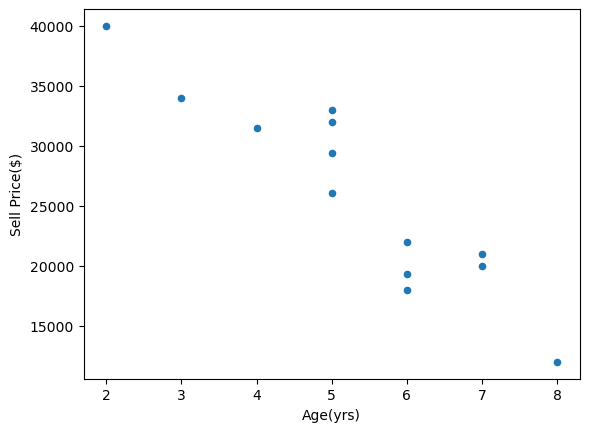

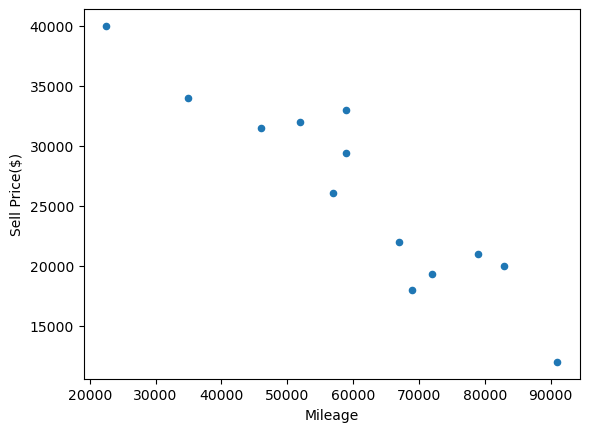

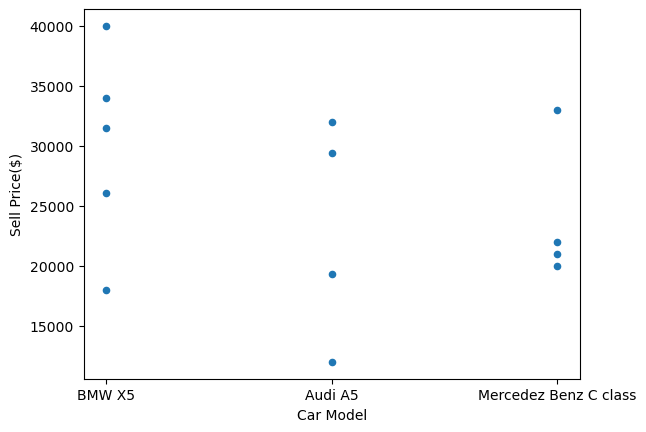

In [10]:
df.plot(kind='scatter',x='Age(yrs)', y='Sell Price($)')
df.plot(kind='scatter',x='Mileage', y='Sell Price($)')
df.plot(kind='scatter',x='Car Model', y='Sell Price($)')

In [14]:
df  = df.rename(columns = {'Car Model':'car_model', 'Mileage' : 'mileage', 'Sell Price($)' : 'sell_price', 
                     'Age(yrs)': 'age'})
df


,car_model,mileage,sell_price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [17]:
dummies = pd.get_dummies(df.car_model, dtype = int)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [19]:
merged = pd.concat([df, dummies], axis='columns')
merged

,car_model,mileage,sell_price,age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [26]:
final = merged.drop(['car_model', 'Audi A5'], axis='columns')
final

,mileage,sell_price,age,BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [30]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [35]:
X = final.drop(['sell_price'], axis='columns').values
X 

array([[69000,     6,     1,     0],
       [35000,     3,     1,     0],
       [57000,     5,     1,     0],
       [22500,     2,     1,     0],
       [46000,     4,     1,     0],
       [59000,     5,     0,     0],
       [52000,     5,     0,     0],
       [72000,     6,     0,     0],
       [91000,     8,     0,     0],
       [67000,     6,     0,     1],
       [83000,     7,     0,     1],
       [79000,     7,     0,     1],
       [59000,     5,     0,     1]])

In [36]:
y = final.sell_price
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: sell_price, dtype: int64

In [37]:
model.fit(X,y)

LinearRegression()

In [39]:
model.predict([[45000, 4, 0, 1]])

array([36991.31721061])

In [40]:
model.predict([[86000, 7, 1, 0]])

array([11080.74313219])

In [42]:
model.score(X, y)

0.9417050937281082